# Percolation analysis

 ### Set up

In [1]:
import os.path
from os import path
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

import config
from config import LEVELS
from create_full_graph_with_single_query import read_or_create_full_graph
from lib.percolation import getCompletenessValues, sampleLinkPercolationWithPercentages
from itertools import repeat
import pandas as pd
import numpy as np

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


 ### Create full interaction Networks for Genes, Proteins and Proteoforms

In [2]:
graphs = { l: read_or_create_full_graph(l, True, config.GRAPHS_PATH) for l in LEVELS}
graphs_no_sm = [read_or_create_full_graph(level, False, config.GRAPHS_PATH, v=False) for level in LEVELS]

    Reading resources\Reactome\genes_interactions.tsv
    Reading resources\Reactome\genes_vertices.tsv
    Reading resources\Reactome\genes_small_molecules_vertices.tsv
        Graph edges: 457443
        Graph nodes: 12789
        Graph genes nodes: 10804
        Graph small molecule nodes: 1947
    Reading resources\Reactome\proteins_interactions.tsv
    Reading resources\Reactome\proteins_vertices.tsv
    Reading resources\Reactome\proteins_small_molecules_vertices.tsv
        Graph edges: 466752
        Graph nodes: 12903
        Graph proteins nodes: 10902
        Graph small molecule nodes: 1963
    Reading resources\Reactome\proteoforms_interactions.tsv
    Reading resources\Reactome\proteoforms_vertices.tsv
    Reading resources\Reactome\proteoforms_small_molecules_vertices.tsv
        Graph edges: 679747
        Graph nodes: 16040
        Graph proteoforms nodes: 14039
        Graph small molecule nodes: 1963
    Reading resources\Reactome\genes_interactions.tsv
    Reading r

### Sample completeness vs lcc size

In [3]:
num_completeness_points = 20
num_replicates = 20
step = 0.1

# P = getCompletenessValues(num_completeness_points)
samples = {}
file_name = 'reports/samples_link_percolation_'
for level in LEVELS:
    if path.exists(file_name + level + '.csv'):
        print(f"Reading percolation samples for {level}")
        samples[level] = pd.read_csv(file_name + level + '.csv')
    else:
        print(f'Sampling link percolation for {level}')
        samples[level] = sampleLinkPercolationWithPercentages(graphs[level], num_replicates, step)
        print(f'Creating csv files.')
        samples[level].to_csv(file_name + level + '.csv')
samples

Reading percolation samples for genes
Reading percolation samples for proteins
Reading percolation samples for proteoforms


{'genes':       Unnamed: 0  index  Completeness  Relative Size  Replicate
 0              0      0      0.899998       0.988811          0
 1              1      1      0.809998       0.982699          0
 2              2      2      0.728998       0.975270          0
 3              3      3      0.656097       0.967184          0
 4              4      4      0.590487       0.959003          0
 ...          ...    ...           ...            ...        ...
 2155        2155   2155      0.000009       0.000094         19
 2156        2156   2156      0.000007       0.000094         19
 2157        2157   2157      0.000004       0.000094         19
 2158        2158   2158      0.000002       0.000094         19
 2159        2159   2159      0.000000       0.000094         19
 
 [2160 rows x 5 columns],
 'proteins':       Unnamed: 0  index  Completeness  Relative Size  Replicate
 0              0      0      0.899998       0.996589          0
 1              1      1      0.809998   

### Plot link percolation curves at 3 granularity levels

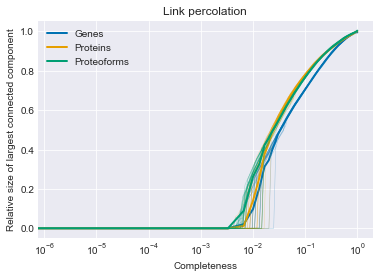

In [5]:
plt.style.use('seaborn-darkgrid')

for level in LEVELS:
    for label, sub_df in samples[level].groupby('Replicate'):
        plt.plot(sub_df['Completeness'], sub_df['Relative Size'], marker='', linewidth=0.5, alpha=0.3, color=config.LEVELS_COLOR[level])

    df_mean = samples[level].groupby('Completeness').mean()
    df_mean = df_mean.reset_index()
    df_mean = df_mean.drop(columns=['Replicate', 'index'])

    x_new = np.linspace(0, 1, 300)
    spl = make_interp_spline(df_mean['Completeness'], df_mean['Relative Size'])
    y_new = spl(x_new)
    plt.plot(x_new, y_new, marker='', linewidth=2, alpha=1, color=config.LEVELS_COLOR[level], label=level.title())

plt.legend()
plt.xscale('log')
plt.title("Link percolation")
plt.xlabel("Completeness")
plt.ylabel("Relative size of largest connected component")
plt.show()

In [ ]:
print(path.exists('reports/samples_link_percolation_genes.csv'))


In [ ]:

# Edge percolation

# TODO: Make scatter plot where each dot is a disease.
#  Number of genes (x) VS Observed module size (y)
# The observed module size is the number of vertices in the lcc of the disease module

